In [1]:
import process_dataset

In [2]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt
from os.path  import join

#
# Set file paths based on added MNIST Datasets
#
input_path = r'A:\Alsou Bek\Documents\programs\ImagetoNumber\data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


mnist_dataloader = process_dataset.MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [3]:
set_data = set(y_train)
set_data

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [4]:
val_count = dict.fromkeys(set_data, 0)
for val in y_train:
    val_count[val] = val_count[val]+1

In [5]:
import numpy

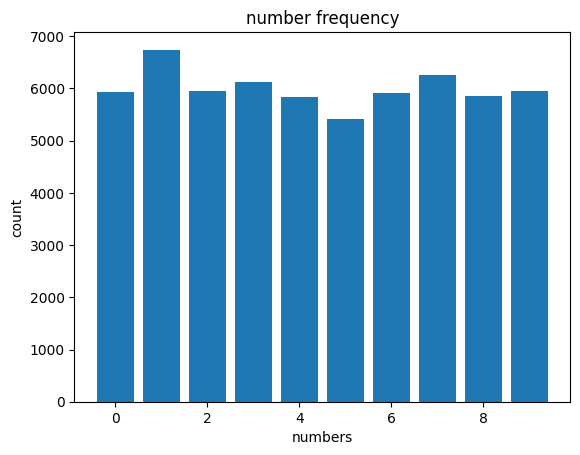

In [6]:
plt.bar(val_count.keys(), val_count.values())
plt.title('number frequency')
plt.xlabel('numbers')
plt.ylabel('count')
plt.show()

In [7]:
import torch
from torch import nn

In [8]:
import models

In [9]:
net = models.ConvNN()

In [10]:
from torch.utils.data import Dataset, DataLoader

In [11]:
train_dataset = process_dataset.MyDataset(x_train, y_train)
test_dataset = process_dataset.MyDataset(x_test, y_test)

a:\Alsou Bek\Documents\programs\ImagetoNumber\process_dataset.py:54: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:256.)
  self.features = torch.FloatTensor(features)


In [12]:
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    losses = []
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        # running_loss += loss.item()
        # if (i+1) % 25 == 0:    # print every 2000 mini-batches
        #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 25:.3f}')
        #     running_loss = 0.0
            
        losses.append(loss.item())

print('Finished Training')

Finished Training


In [15]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

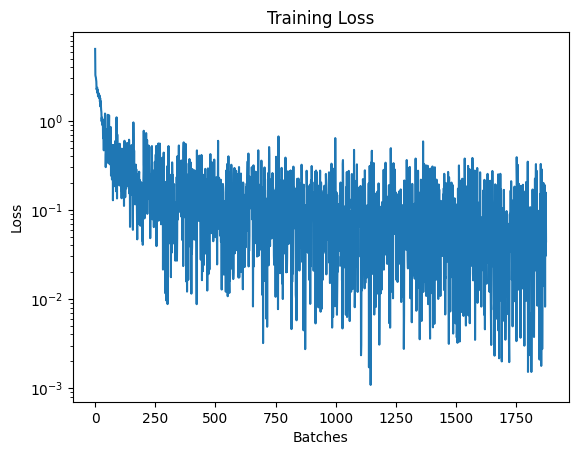

In [16]:
plt.plot(losses)
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.yscale('log')
plt.show()

In [17]:
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

In [18]:
net = models.ConvNN()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [24]:
outputs = net(images)

In [30]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')


Accuracy of the network on the 10000 test images: 98.24 %


In [33]:
incorrect_count = dict.fromkeys(set_data, 0)
print(len(labels))
for i in range(len(labels)):
    if labels[i] != predicted[i]:
        incorrect_count[labels[i]] += 1
incorrect_count

16


{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.5..128.0].


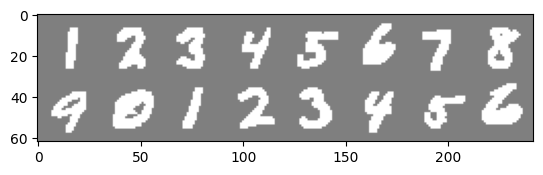

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])


In [22]:
import torchvision
imshow(torchvision.utils.make_grid(images))
print(labels[0:16])
print(predicted[0:16])